# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print("Number of Mice tested:")
mouse_data_complete["Mouse ID"].nunique()

Number of Mice tested:


249

In [19]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_data_complete.drop_duplicates(subset=['Mouse ID',"Timepoint"])
mouse_data_complete.head(15)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_byid=mouse_data_complete.drop_duplicates(subset=['Mouse ID'])


In [92]:
# Checking the number of mice in the clean DataFrame.
mouse_data_complete['Mouse ID'].nunique()
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#data_by_regimen=mouse_data_complete.groupby(['Drug Regimen']).describe()

#data_by_regimen.head(10)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. SEM=standard error on means

data_by_regimen_tumor=mouse_data_complete[['Drug Regimen','Tumor Volume (mm3)']].copy()
data_by_regimen_tumor=data_by_regimen_tumor.groupby(['Drug Regimen']).describe()

data_sem=mouse_data_complete[['Drug Regimen','Tumor Volume (mm3)']].copy()
data_sem=data_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Volume SEM (mm3)"})
data_sem=data_sem.groupby(['Drug Regimen']).sem()

data_sem.head(10)
data_by_regimen_tumor=data_by_regimen_tumor.merge(data_sem,how='right',on=["Drug Regimen"])
#data_sem.head()
# Assemble the resulting series into a single summary DataFrame.
data_by_regimen_tumor


C:\Users\Leo\AppData\Local\Temp\ipykernel_35768\1402342768.py:17: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  data_by_regimen_tumor=data_by_regimen_tumor.merge(data_sem,how='right',on=["Drug Regimen"])


,"(Tumor Volume (mm3), count)","(Tumor Volume (mm3), mean)","(Tumor Volume (mm3), std)","(Tumor Volume (mm3), min)","(Tumor Volume (mm3), 25%)","(Tumor Volume (mm3), 50%)","(Tumor Volume (mm3), 75%)","(Tumor Volume (mm3), max)",Tumor Volume SEM (mm3)
Drug Regimen,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

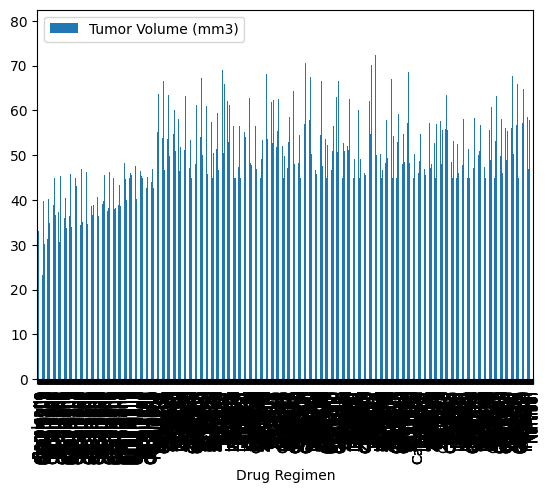

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_data_complete.plot(kind='bar',x='Drug Regimen',y='Tumor Volume (mm3)')

<BarContainer object of 1893 artists>

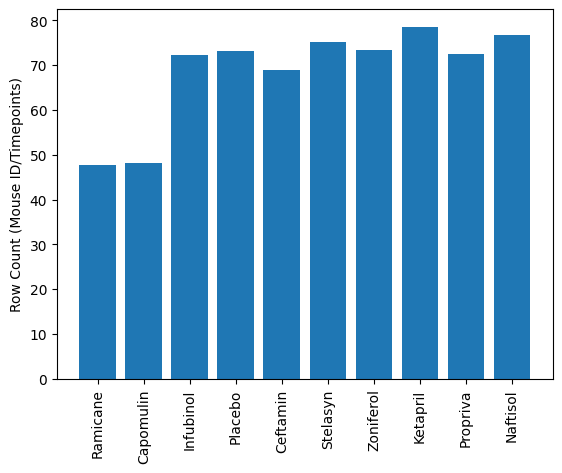

In [74]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.xticks(rotation = 90)
plt.ylabel("Row Count (Mouse ID/Timepoints)")
plt.bar(mouse_data_complete['Drug Regimen'], mouse_data_complete['Tumor Volume (mm3)'], align="center")

<Axes: >

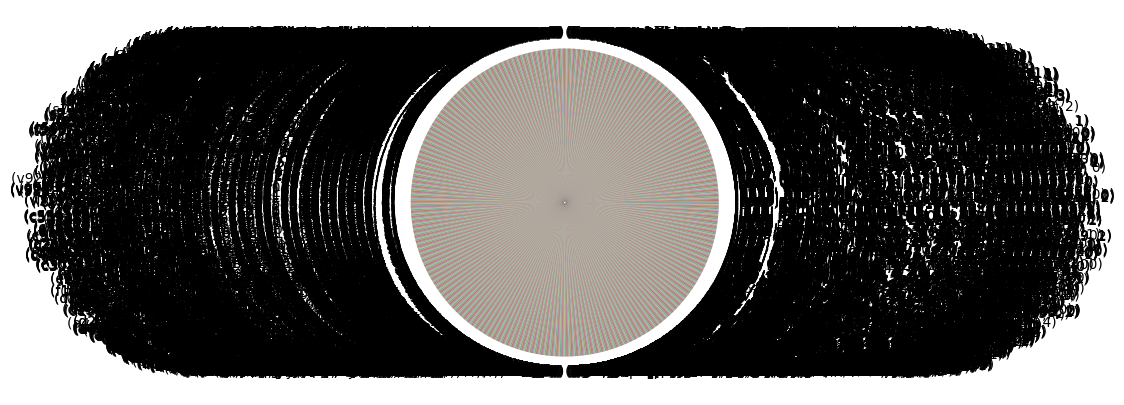

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex_count=mouse_data_complete.value_counts()
mouse_sex_count.plot.pie(y='Sex',figsize=(5, 5))

TypeError: autopct must be callable or a format string

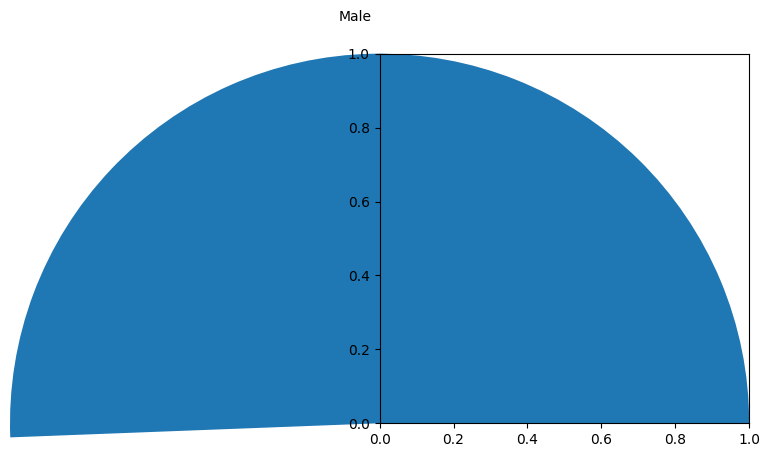

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex_data=[]

mouse_sex_data=mouse_data_complete['Sex'].value_counts()

mouse_sex_data.index

#mouse_sex_data.value_counts()

plt.pie(mouse_sex_data,labels=mouse_sex_data.index,autopct=mouse_sex_data)

## Quartiles, Outliers and Boxplots

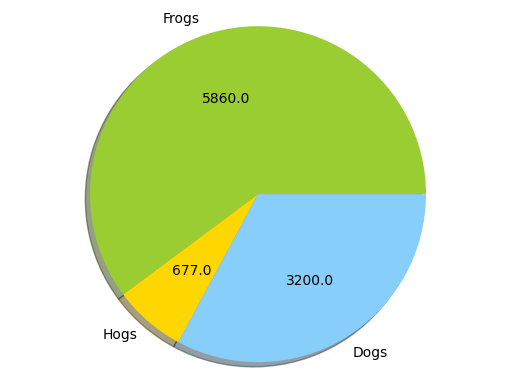

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
import matplotlib.pyplot as plt
import numpy

labels = 'Frogs', 'Hogs', 'Dogs'
sizes = numpy.array([5860, 677, 3200])
colors = ['yellowgreen', 'gold', 'lightskyblue']

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

plt.pie(sizes, labels=labels, colors=colors,
        autopct=absolute_value, shadow=True)

plt.axis('equal')
plt.show()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
